# **Welcome to my Notebook**
Made by Jundan Saiful Haq for DSAI Recruitment.

In this notebook, here, i will do an Airbnb price prediction which is useful for tourists who want to find the best accommodation according to their version and their capabilities.

# 1. Import some libraries, read the CSV, and merge the data

Import the common libraries first, and then read each csv files and convert into data frame. And save the test id's so that we can make submission from id's that we save

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [134]:
traindf = pd.read_csv("sample_data/train.csv")
airbnbdf = pd.read_csv("sample_data/airbnb.csv")
hostdf = pd.read_csv("sample_data/host.csv")
commentdf = pd.read_csv("sample_data/comment.csv")
reviewdf = pd.read_csv("sample_data/review.csv")
testdf = pd.read_csv("sample_data/test.csv")

test_id = testdf['id']

Data merge:

In [135]:
train_merged1 = pd.merge(traindf, airbnbdf, on='id', how='left')
train_merged2 = pd.merge(train_merged1, hostdf, on='id', how='left')
train_final = pd.merge(train_merged2, reviewdf, on='id', how='left')

# 2. EDA (Exploration Data Analysis)

In this section, we will investigate the data statistics, like five first data (df.head), checking the datatype (df.info), checking missing values (df.isnull().sum()), and check the mean, mode, etc (df.describe()).

In [136]:
print("Rows and columns:")
print(train_final.shape)

print("\n5 first final data: ")
print(train_final.head())
print("\nDatatype: ")
print(train_final.info())

print("\nMissing values: ")
print(train_final.isnull().sum())
print("\nDuplicated data:")
print(train_final.duplicated().sum())

print("Data statistics: ")
train_final.describe()

Rows and columns:
(2954, 45)

5 first final data: 
                    id  price  \
0   840338886577189778   88.0   
1             25963531   76.0   
2             15813099  202.0   
3  1159877277633034540  531.0   
4   630126688219312259  345.0   

                                                name  \
0                   Private room w/ private bathroom   
1  AweSome view* Ensuite 1+1 @ City (Not For Tour...   
2              Newton -few minutes from Orchard Road   
3                                 Superior Twin Room   
4             Modern 3 BR Walking To Viva Vista Mall   

                                         description  \
0  Room comes w/ a comfy queen size bed, a built-...   
1  1. Private living room space with cable-TV and...   
2  A cosy charming British townhouse with 3 color...   
3  Located on the east side of Singapore. Changi ...   
4  This modern apartment is located in Queenstown...   

                               neighborhood_overview  \
0                   

,id,price,accommodates,bedrooms,beds,minimum_nights,maximum_nights,longitude,latitude,minimum_minimum_nights,...,host_total_listings_count,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2.954000e+03,2954.000000,2954.000000,2711.000000,2264.000000,2954.000000,2954.000000,2954.000000,2954.000000,2953.000000,...,2954.000000,2954.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1486.000000,1486.000000,1487.000000
mean,6.192201e+17,361.547223,2.638795,1.237182,1.589664,61.047393,624.580230,103.844183,1.309825,58.440569,...,118.115098,10.192959,4.525373,4.565723,4.506785,4.736503,4.694210,4.689341,4.425814,0.607592
std,6.044228e+17,764.335605,1.722896,0.768977,1.299546,55.754588,407.081999,0.043163,0.030919,56.331096,...,229.708062,40.754724,0.649766,0.637359,0.659777,0.489416,0.576292,0.473937,0.659846,1.641083
min,7.189600e+04,-248.748230,1.000000,0.000000,0.000000,1.000000,7.000000,103.648280,1.222720,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,3.435329e+07,100.000000,2.000000,1.000000,1.000000,2.000000,365.000000,103.833880,1.291902,1.000000,...,5.000000,0.000000,4.330000,4.400000,4.265000,4.670000,4.670000,4.560000,4.140000,0.050000
50%,6.752423e+17,232.000000,2.000000,1.000000,1.000000,92.000000,365.000000,103.843999,1.304310,92.000000,...,16.000000,1.000000,4.750000,4.800000,4.750000,4.930000,4.920000,4.860000,4.600000,0.170000
75%,1.245038e+18,405.788150,3.000000,1.000000,2.000000,92.000000,1125.000000,103.860173,1.316936,92.000000,...,99.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.535000
max,1.518509e+18,13000.000000,16.000000,8.000000,22.000000,700.000000,9001.000000,103.985176,1.457802,700.000000,...,885.000000,961.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.070000


I added some visualzation too, to make it more readable for more people.

Visualization of Airbnb price based on their Latitude and Longitude:

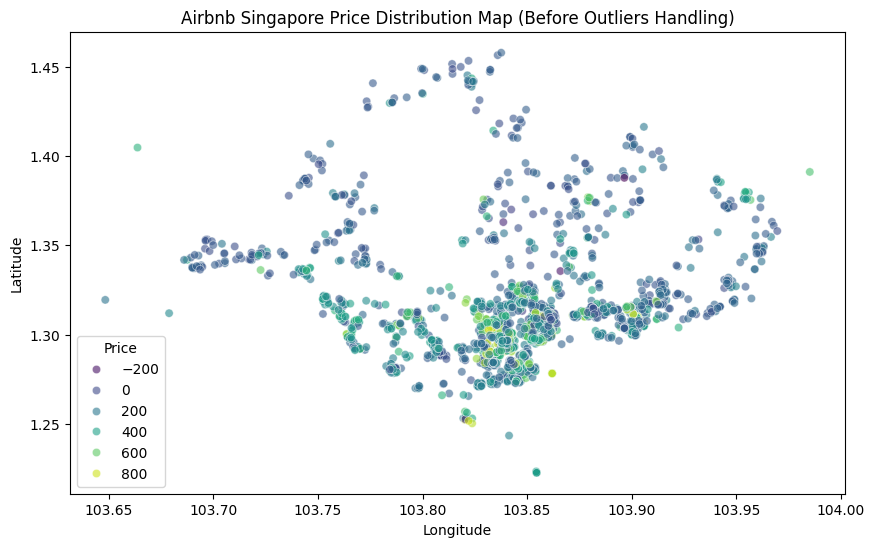

In [137]:
plt.figure(figsize=(10, 6))

map_df = train_final[train_final['price'] < train_final['price'].quantile(0.95)]

sns.scatterplot(x='longitude', y='latitude', hue='price',
                data=map_df, palette='viridis', alpha=0.6)
plt.title('Airbnb Singapore Price Distribution Map (Before Outliers Handling)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price')
plt.show()

From the visualization above, we can see that latitude and longitude affect the price. The place with latitude around 103.75-103.90 and altitude around 1.25-1.35 has a relatively high price because of its more strategic location in Singapore

visualisasi outlier pada data:


<Axes: xlabel='price'>

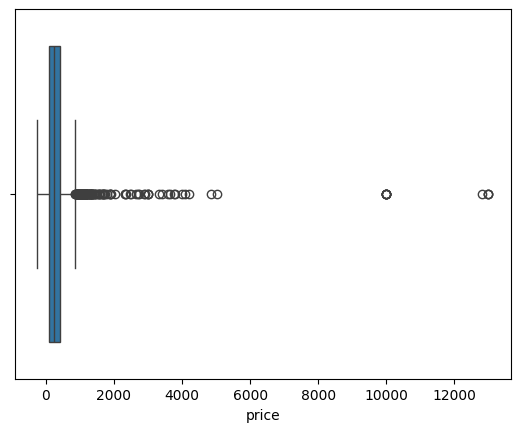

In [138]:
print("visualisasi outlier pada data:")
sns.boxplot(x=train_final['price'])

You can see that there are so many outlier in the train dataset, so we have to normalize that data using capping method in the next section

# 3. PreProcessing Data

In this section, we'd like to repair data and clean data. In this data, there are so many missing values (from isnull().sum() above), and we have to clean that feature if it's missing values within 80% or more from total data. We have to find the duplicate data, outlier, and data anomalies.

**But**, before we start our preprocessing data section, we must split our data first, and drop the unused feature.

In [139]:
train_final = train_final.drop(['id', 'name', 'description', 'neighborhood_overview', 'bathrooms_text', 'host_about', 'host_neighbourhood', 'host_verifications'], axis=1)
test = testdf.drop(['id'], axis=1)

y = train_final['price']
x = train_final.drop(['price'], axis=1)

numerical_features = x.select_dtypes(include=['int', 'float']).columns
categorical_features = x.select_dtypes(include=['object']).columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_raw = x_train.copy()
x_test_raw = x_test.copy()

I also add the copy of raw data, so we can use CatBoost modeling method that more accurate when using not encoded data instead of encoded.

If we look from the section above, there are so many outlier data, and there are some anomalies data (negative price), we can see that from min price above. We will assume that it's a typo, so we will use absolute to make negative value positive.

In [140]:
y_train = y_train.abs()

And for the outlier data, we will normalize the data using capping method. This method will limiting the max values for example, if we limit the price to 4000, then prices above 4000 will be converted to 4000.

To determine the upper limit and lower limit of our data, we will use the IQR method. IQR is the distance between the third quartile (Q3) and the first quartile (Q1)

$IQR = Q_3 - Q_1$

To determine our upper limit and bottom limit, we can use this method:

Upper limit formula:

$\text{Upper Limit} = Q_3 + (1.5 \cdot IQR)$


In [141]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)

Change data that above than upper limit and below than lower limit

In [142]:
y_train = pd.Series(np.where(y_train > upper_limit, upper_limit, y_train), index=y_train.index)

After limitting our max prices into upper limit, now, we will drop feature that contain 50% or more missing values, and if there are some missing value, but under 50%, we will fill that with simple Imputer

In [143]:
nan_percent = x_train.isnull().mean() * 100
cols_to_drop = nan_percent[nan_percent > 50].index

x_train = x_train.drop(columns=cols_to_drop)

Import simple imputer library to use it

In [144]:
from sklearn.impute import SimpleImputer

We must redefine the numerical features and categorical features because there is a feature that got dropped while we're dropping more than 50% missing values.

And after that, we can fill the missing value with simple imputer.

In [145]:
numerical_features = x_train.select_dtypes(include=['int', 'float']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
x_train[numerical_features] = imputer_num.fit_transform(x_train[numerical_features])
x_test[numerical_features] = imputer_num.transform(x_test[numerical_features])

imputer_cat = SimpleImputer(strategy='most_frequent')
x_train[categorical_features] = imputer_cat.fit_transform(x_train[categorical_features])
x_test[categorical_features] = imputer_cat.transform(x_test[categorical_features])

Next step is we will encode the categorical features into number to make the machine learning more easily. After I oberved it, I found that there are two types op categorical, single text or just only 1 sentence, and multi text, like array. So we must divide it into 2 different steps.

First is multi text feature, in this case is "amenities". We will use ast to make it converted into its base structure, and using re for cleaning unwanted character.

In [146]:
import ast
import re
from sklearn.preprocessing import MultiLabelBinarizer

x_train['amenities'] = x_train['amenities'].apply(ast.literal_eval)
x_test['amenities'] = x_test['amenities'].apply(ast.literal_eval)

def clean_amenities(lst):
    cleaned_list = []
    for item in lst:
        cleaned = re.sub(r'[^\x00-\x7F]+', '', item)
        if cleaned != '':
            cleaned_list.append(cleaned)

    return cleaned_list

x_train['amenities'] = x_train['amenities'].apply(clean_amenities)
x_test['amenities'] = x_test['amenities'].apply(clean_amenities)

mlb = MultiLabelBinarizer()
amenities_train = mlb.fit_transform(x_train['amenities'])
amenities_test = mlb.transform(x_test['amenities'])

amenities_train_df = pd.DataFrame(amenities_train, columns=mlb.classes_, index=x_train.index)
amenities_test_df = pd.DataFrame(amenities_test, columns=mlb.classes_, index=x_test.index)

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['20 inch HDTV with standard cable', '65 inch HDTV with Netflix, standard cable', '70 inch HDTV with Apple TV', 'Baby bath - available upon request', 'Biology Smart Skincare Amenities body soap', 'Biology Smart Skincare Amenities shampoo', 'Exercise equipment: free weights, stationary bike, yoga mat', 'Fast wifi  539 Mbps', 'Free driveway parking on premises  1 space', 'Free driveway parking on premises  6 spaces', 'Free parking garage on premises  1 space', 'Free parking on premises  1 space', 'HDTV with Amazon Prime Video, standard cable, Apple TV, Disney+, Netflix, Chromecast', 'HDTV with Netflix, standard cable', 'Housekeeping available from 9:00AM to 12:00PM, Sunday', 'Housekeeping available from 9:00AM to 3:00PM, 3 days a week', 'Housekeeping available from 9:30AM to 3:00AM, 3 days a week', 'Miele induction stove', 'Omno. body soap', 'Omno. shampoo', 

Merge that new encoded amenities feature into our existing train and test dataframe and drop the old one that still in categorical

In [147]:
x_train = pd.concat([x_train.drop(columns=['amenities']), amenities_train_df], axis=1)
x_test = pd.concat([x_test.drop(columns=['amenities']), amenities_test_df], axis=1)

x_train.head()

,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,instant_bookable,longitude,latitude,...,Washer,Washer In building,Washer In unit,Waterfront,Whirlpool double oven,Wifi,Wifi 41 Mbps,Window AC unit,Window guards,Wine glasses
2222,Entire serviced apartment,Entire home/apt,4.0,1.0,1.0,2.0,365.0,t,103.840122,1.295964,...,1,0,0,0,0,1,0,0,0,0
1491,Private room in rental unit,Private room,1.0,1.0,1.0,92.0,365.0,t,103.861620,1.307750,...,1,0,0,0,0,1,0,0,0,0
2862,Private room in rental unit,Private room,2.0,1.0,1.0,92.0,1125.0,f,103.829510,1.293070,...,1,0,0,0,0,1,0,0,0,0
358,Private room in rental unit,Private room,1.0,1.0,1.0,92.0,1125.0,t,103.860180,1.309630,...,1,0,0,0,0,1,0,0,0,0
807,Private room in rental unit,Private room,1.0,1.0,0.0,92.0,365.0,t,103.842170,1.283200,...,1,0,0,0,0,1,0,0,0,0


After encoding that multi text, now we will encode that single text too using HotOneEncoder.

In [148]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = x_train.select_dtypes(include=['object']).columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_train = ohe.fit_transform(x_train[categorical_columns])
ohe_test = ohe.transform(x_test[categorical_columns])

ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(categorical_columns), index=x_train.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(categorical_columns), index=x_test.index)

Merge that new encoded single text dataframe into our new final dataframe

In [149]:
numeric_columns = x_train.select_dtypes(include=['int', 'float']).columns

x_train_final = pd.concat([x_train[numeric_columns], ohe_train_df], axis=1)
x_test_final = pd.concat([x_test[numeric_columns], ohe_test_df], axis=1)

Visualization of how the feature affect the prediction of the model

                     price  accommodates  bedrooms      beds  minimum_nights  \
price             1.000000      0.365903  0.215434  0.181291       -0.373474   
accommodates      0.365903      1.000000  0.526620  0.470748       -0.105974   
bedrooms          0.215434      0.526620  1.000000  0.407341        0.115135   
beds              0.181291      0.470748  0.407341  1.000000       -0.078859   
minimum_nights   -0.373474     -0.105974  0.115135 -0.078859        1.000000   
availability_365 -0.035594      0.062431  0.011269  0.095345       -0.083536   

                  availability_365  
price                    -0.035594  
accommodates              0.062431  
bedrooms                  0.011269  
beds                      0.095345  
minimum_nights           -0.083536  
availability_365          1.000000  


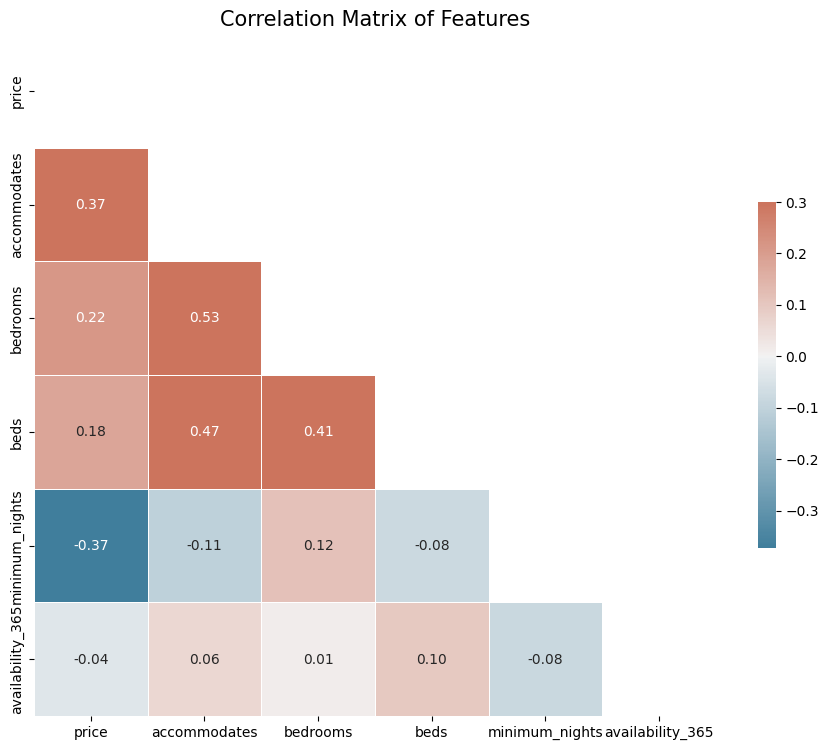

In [150]:
df_viz = x_train_final.copy()
df_viz['price'] = y_train

cols_to_plot = ['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_365']
corr = df_viz[cols_to_plot].corr()

print(corr)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features', fontsize=15)
plt.show()

The heatmap above shows the strength of the relationship of each numeric features and price. Correlation values range from -1 (not relevant) to 1 (most relevant).

We can see that from the price as x axis.

For examples: 
- Accomodates (0.37), that shows to us that the capacity of the airbnb affect to its price (has the strongest positive relationship with price)
- Beds (0.18), that shows to us that the number of beds not that really affect to the Airbnb price (because it's close to 0)
- Availability_365 (0.04) that shows to us that the availability didn't affect the price at all (Redundant feature)

That's all for the PreProcessing step, we will continue to our next step.

# 4. Modeling

In this step, this is how we train our model from dataframe that we have modifed before. In this step, we will use some models. Here, I want to use RandomForestRegressor and CatBoost. Random forest is a method that using a collection of several semantic trees. In the other hands, CatBoost works by managing categorical variables natively, without requiring complex data preprocessing such as one-hot encoding which is often required by other decision tree-based algorithms.

**a. Catboost Regressor**

Import catboost regressor first, and then you can use it.

In [151]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

Start modeling with catboost.

In [152]:
cb_model = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=0)

param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=cb_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Training data menggunakan CatBoost")

object_cols_raw_train = x_train_raw.select_dtypes(include='object').columns

for col in object_cols_raw_train:
    x_train_raw[col] = x_train_raw[col].fillna('Unknown').astype(str)
    x_test_raw[col] = x_test_raw[col].fillna('Unknown').astype(str)

categorical_features_for_catboost = x_train_raw.select_dtypes(include=['object']).columns.tolist()

random_search.fit(x_train_raw, y_train, cat_features=categorical_features_for_catboost, eval_set=(x_test_raw, y_test), early_stopping_rounds=50)

Training data menggunakan CatBoost
Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,<catboost.cor...002D9D699EF90>
,param_distributions,"{'depth': [4, 6, ...], 'iterations': [500, 1000], 'l2_leaf_reg': [1, 3, ...], 'learning_rate': [0.01, 0.05, ...], ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


Save the best parameter from RandomizedSearch

In [153]:
print("\nParameter Terbaik:", random_search.best_params_)
print("Skor Terbaik (MSE rata-rata):", -random_search.best_score_)

best_model_randomized = random_search.best_estimator_
y_pred_cb = best_model_randomized.predict(x_test_raw)


Parameter Terbaik: {'subsample': 1.0, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 6}
Skor Terbaik (MSE rata-rata): 123.90429897166287


**b. Random Forest Regressor**

First thing to do is import model sklearn. I'm using GridSearch to find best combination of parameters.

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

print("Searching for best paramerets")
grid_search.fit(x_train_final, y_train)

Searching for best paramerets
Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 15, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


Save the best parameter into a variabel

In [155]:
print("\nParameter Terbaik:", grid_search.best_params_)
print("Skor Terbaik (MSE rata-rata):", -grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(x_test_final)


Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Skor Terbaik (MSE rata-rata): 16908.688178410204


# 5. Model Evaluation

In this last of our section, we're gonna evaluate the model that we have used to predict. Here, we will calculate the error of our models using sklearn.metrics method. I'm using Mean Absolute Error (MEA), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the r2_score methods.

Import first and then use it

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_evaluation(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return [model_name, mae, mse, rmse, r2]

hasil_cb = model_evaluation("CatBoost Regressor", y_test, y_pred_cb)
hasil_rf = model_evaluation("Random Forest Regressor", y_test, y_pred_rf)

And after that error comparisor between two models, we have to decide, which model has less error number. We use dataframe and visualization to finding the best models.


Model Evaluation Comparison:
                     Model         MAE            MSE        RMSE        R2
0       CatBoost Regressor  121.459034  232209.798826  481.881519  0.267529
1  Random Forest Regressor  121.573493  239668.253717  489.559244  0.244003


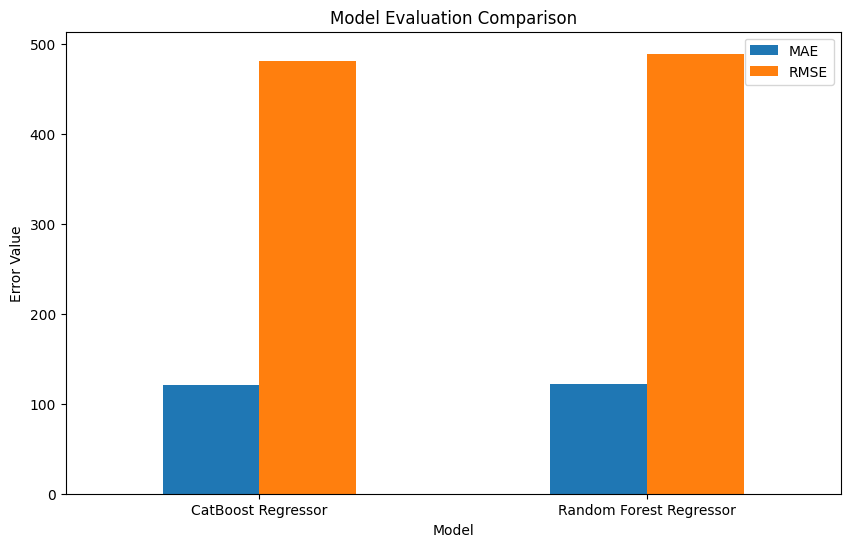

In [157]:
df_eval = pd.DataFrame([hasil_cb, hasil_rf], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

print("\nModel Evaluation Comparison:")
print(df_eval)

df_eval.plot(x='Model', y=['MAE', 'RMSE'], kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Comparison')
plt.ylabel('Error Value')
plt.xticks(rotation=0)
plt.show()

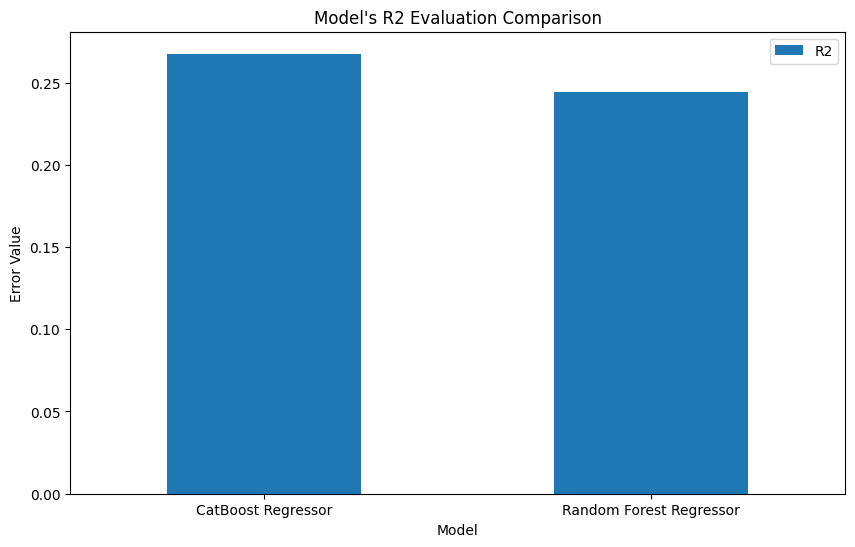

In [158]:
df_eval.plot(x='Model', y=['R2'], kind='bar', figsize=(10, 6))
plt.title('Model\'s R2 Evaluation Comparison')
plt.ylabel('Error Value')
plt.xticks(rotation=0)
plt.show()

As you can see, the CatBoost model is better than RandomForestRegresson in this case. The CatBoost model metrics is all higher than RandomForestRegressor. So we will use the prediction from CatBoost for the submission of our prediction.

We must merge all the data with its each feature to predict the price, so we'll have to merge and simple preprocessing again like we do at the beginning of this notebook.

In [160]:
df_test_ids = pd.read_csv('sample_data/test.csv')
df_airbnb = pd.read_csv('sample_data/airbnb.csv')
df_host = pd.read_csv('sample_data/host.csv')
df_review = pd.read_csv('sample_data/review.csv')

test_merged1 = pd.merge(df_test_ids, df_airbnb, on='id', how='left')
test_merged2 = pd.merge(test_merged1, df_host, on='id', how='left')
test_final = pd.merge(test_merged2, df_review, on='id', how='left')

test_prep = test_final.drop(['id', 'name', 'description', 'neighborhood_overview', 'bathrooms_text', 'host_about', 'host_neighbourhood', 'host_verifications'], axis=1)

required_columns = best_model_randomized.feature_names_
test_prep = test_prep[required_columns]

cat_features = test_prep.select_dtypes(include=['object']).columns
for col in cat_features:
    test_prep[col] = test_prep[col].fillna('Unknown').astype(str)

num_features = test_prep.select_dtypes(include=['int', 'float']).columns
for col in num_features:
    median_value = train_final[col].median()
    test_prep[col] = test_prep[col].fillna(median_value)

To submit the prediction, we will predict the test dataset first, merge the id from our backup and convert that into csv

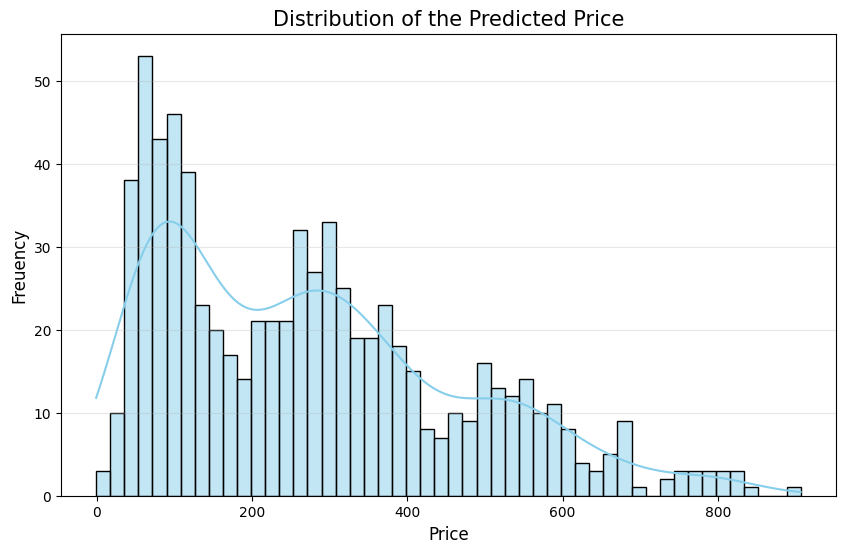

In [162]:
y_pred_final = best_model_randomized.predict(test_prep)

submission = pd.DataFrame({
    'id': test_id,
    'price': y_pred_final
})

submission.head()

plt.figure(figsize=(10, 6))

sns.histplot(submission['price'], kde=True, color='skyblue', bins=50)

plt.title('Distribution of the Predicted Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Freuency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

submission.to_csv("sample_data/submission/submission6.csv", index=False)

This visualization show us distribution with Frequency vs Price, most of them are in the range 0-400$ price.

# So thats all from my process and step by step about how we predicted the price of the Airbnb in Singapore with some datasets

In this notebook we're done for make prediction about Airbnb prices in Singapore. 
We trained and compared two models, RandomForest and CatBoost.
The evaluation metrics showed that CatBoost performed better, so it was used as the final model.

Using this model, we generated price predictions for the test data and created the final submission file.

And yeah... So that's from me, I apologize if there are still many mistakes in this notebook, however I am still new to learning about data science, so I hope my mistakes can be understood.

Sayonara